# Image ETL
### Images directly from flickr to AWS s3
### The code shows both original and transformed images before uploading to aws s3

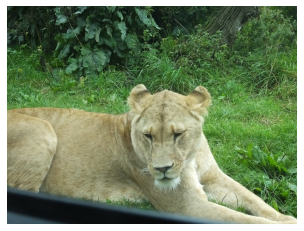

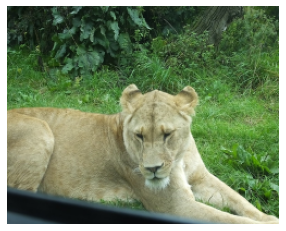

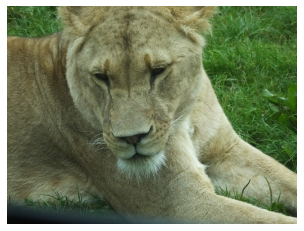

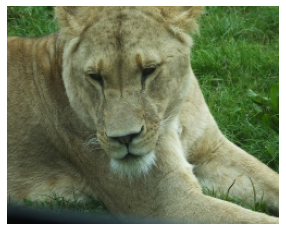

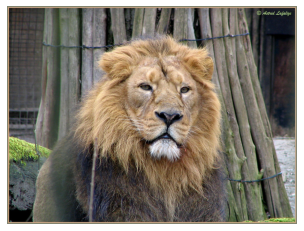

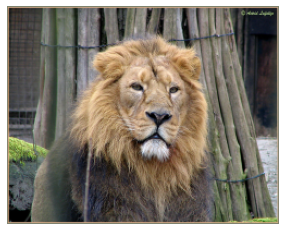

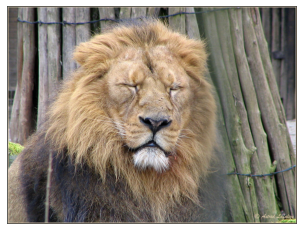

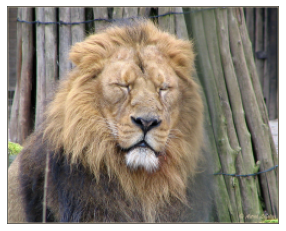

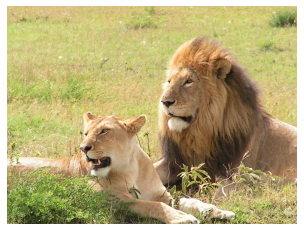

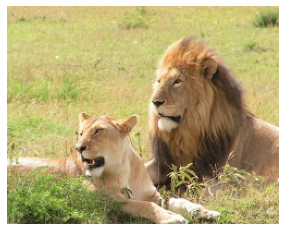

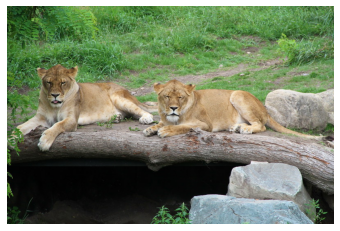

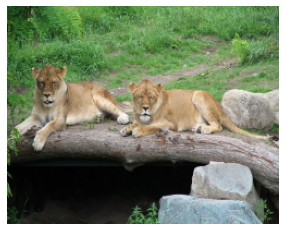

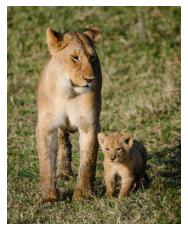

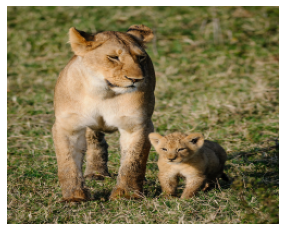

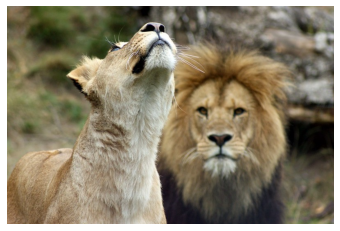

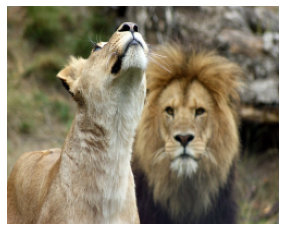

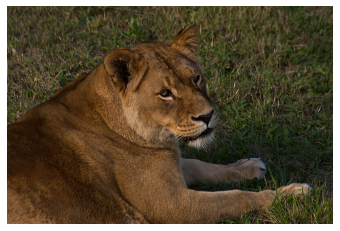

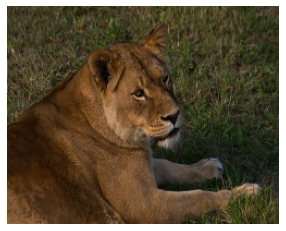

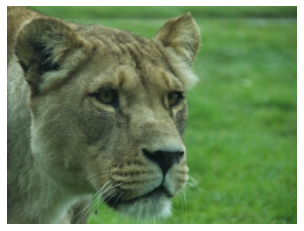

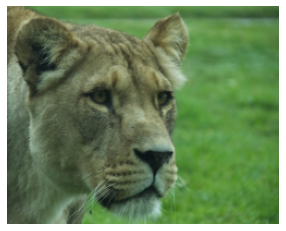

In [2]:
#import flickr_api
import flickrapi
# from urllib.request import urlretrieve
import urllib
import urllib.request
# opencv approach
import numpy as np
import cv2
import matplotlib.pyplot as plt
#import metadata_parser
from PIL import Image
import re
#import boto3 for aws
import boto3
from  pathlib import Path
import io


# Flickr api access key 
# https://www.flickr.com/services/api/misc.api_keys.html

flickr=flickrapi.FlickrAPI('secret_access', 'access_token', cache=True)


keyword = 'lions'

# Have user enter search phrase

#keyword = input('Please enter your search item:  ')

# to specify where on earth (WOE) to do your search : https://www.flickr.com/services/api/flickr.places.find.html


photos = flickr.walk(text=keyword,
                     tag_mode='all',
                     tags=keyword,
                     extras='url_c',
                     per_page=100,           # may be you can try different numbers..
                     sort='relevance')

urls = []
#pages_metadata = []

for i, photo in enumerate(photos):
    #print (i)
    
    url = photo.get('url_c')
    urls.append(url)
    
    # to collect metadata
    # pip install metadata_parser
    # import metadata_parser
    #page = metadata_parser.MetadataParser(url)
    #imagetitle = page.get_metadata('title')
    #pages_metadata.append(page.metadata)
    
    # get 10 urls
    if i >= 9:
        break
        

num=0
for images in urls:
    req = urllib.request.urlopen(images)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    
    #Read image in link with the strings attacheded
    img = cv2.imdecode(arr, -1)
     # convert from BGR to RGB so we can plot using matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # disable x & y axis
    plt.axis('off')
    # show the image
    plt.imshow(img)
    plt.show()

    # Image transformaton
    # get the image shape (size scaling)
    rows, cols, dim = img.shape
    img_shrinked = cv2.resize(img, (250, 200),
                         interpolation=cv2.INTER_AREA)
    # disable x & y axis
    plt.axis('off')
    # show the resulting image
    plt.imshow(img_shrinked)
    plt.show()



    #Changing data from array to be saved in-memory
    img_shrinked = Image.fromarray(img_shrinked)
    # Save the image to an in-memory file
    in_mem_file = io.BytesIO()
    img_shrinked.save(in_mem_file, format='png')
    in_mem_file.seek(0)

   
    #Establishing connection to aws
    s3_client=boto3.client('s3', 
                aws_access_key_id=" ", 
                aws_secret_access_key= " "
                )
    
     # uploading data to AWS
    s3_client.put_object(Bucket='bucket_name', Key = 'lions' + str(num) + '.jpg', Body = in_mem_file, ContentType= 'image/png')
    num += 1

In [ ]:
# Opencv Approach